In [1]:
import torch
from torch import nn
from RNN import rnn

Epoch 10, Perplexity: 20.41, Speed: 15524.71 tokens/sec
Epoch 20, Perplexity: 20.07, Speed: 13966.11 tokens/sec
Epoch 30, Perplexity: 19.03, Speed: 15320.05 tokens/sec
Epoch 40, Perplexity: 16.89, Speed: 15332.07 tokens/sec
Epoch 50, Perplexity: 14.37, Speed: 15645.92 tokens/sec
Epoch 60, Perplexity: 13.11, Speed: 16586.90 tokens/sec
Epoch 70, Perplexity: 12.34, Speed: 15030.46 tokens/sec
Epoch 80, Perplexity: 11.74, Speed: 15582.90 tokens/sec
Epoch 90, Perplexity: 11.21, Speed: 15535.98 tokens/sec
Epoch 100, Perplexity: 10.73, Speed: 13764.62 tokens/sec
Epoch 110, Perplexity: 10.31, Speed: 15048.58 tokens/sec
Epoch 120, Perplexity: 9.92, Speed: 14354.04 tokens/sec
Epoch 130, Perplexity: 9.55, Speed: 16558.56 tokens/sec
Epoch 140, Perplexity: 9.19, Speed: 15752.99 tokens/sec
Epoch 150, Perplexity: 8.85, Speed: 15186.33 tokens/sec
Epoch 160, Perplexity: 8.54, Speed: 14627.48 tokens/sec
Epoch 170, Perplexity: 8.23, Speed: 14781.93 tokens/sec
Epoch 180, Perplexity: 7.91, Speed: 16597.37 t

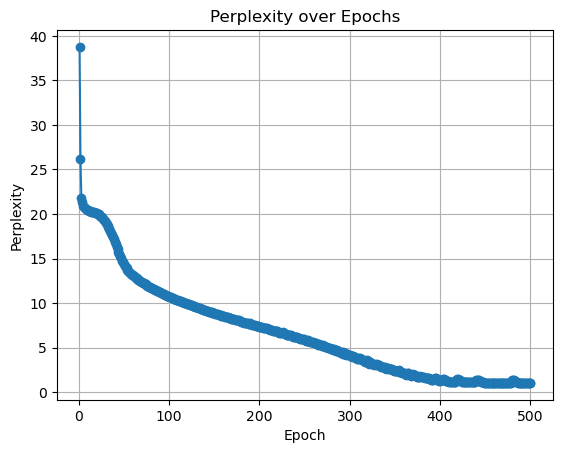

In [2]:
batch_size = 32
num_steps = 35
train_iter,vocab = rnn.load_data_time_machine(batch_size,num_steps)

def get_params(vocab_size,num_hiddens,device):
	num_inputs = num_outputs = vocab_size
	def normal(shape):
		return torch.rand(size =shape,device=device) * 0.01
	def three():
		return (normal((num_inputs, num_hiddens)), normal((num_hiddens, num_hiddens)), torch.zeros(num_hiddens, device=device))
	
	W_xz,W_hz,b_z = three() # update gate
	W_xr,W_hr,b_r = three() # reset gate
	W_xh,W_hh,b_h = three() # hidden state

	# 输出层参数
	W_hq = normal((num_hiddens,num_outputs))
	b_q = torch.zeros(num_outputs,device=device)

	params = [W_xz,W_hz,b_z,W_xr,W_hr,b_r,W_xh,W_hh,b_h,W_hq,b_q]
	
	# 附加梯度
	for param in params:
		param.requires_grad_(True)

	return params

def init_gru_state(batch_size,num_hiddens,device):
	return (torch.zeros((batch_size,num_hiddens),device=device),)

def gru(inputs,state,params):
	W_xz,W_hz,b_z,W_xr,W_hr,b_r,W_xh,W_hh,b_h,W_hq,b_q = params
	H, = state
	outputs = []

	for X in inputs:
		Z = torch.sigmoid((X @ W_xz) + (H @ W_hz) + b_z)
		R = torch.sigmoid((X @ W_xr) + (H @ W_hr) + b_r)
		H_tilda = torch.tanh((X @ W_xh) + ((R * H) @ W_hh) + b_h)
		H = Z * H + (1 - Z) * H_tilda
		Y = (H @ W_hq) + b_q
		outputs.append(Y)

	return torch.cat(outputs,dim=0),(H,)


vocab_size,num_hiddens,device = len(vocab),256,torch.cuda.current_device() if torch.cuda.is_available() else torch.device('cpu')


In [ ]:

num_epochs,lr = 500,1

model = rnn.RNNModelScratch(vocab_size=vocab_size, num_hiddens=num_hiddens, device=device,
                             get_params=get_params, init_state=init_gru_state, forward_fn=gru)

rnn.train(model, train_iter, vocab, lr, num_epochs, device)

Epoch 10, Perplexity: 18.89, Speed: 175115.27 tokens/sec
Epoch 20, Perplexity: 14.57, Speed: 175348.14 tokens/sec
Epoch 30, Perplexity: 12.33, Speed: 175992.75 tokens/sec
Epoch 40, Perplexity: 11.22, Speed: 171730.39 tokens/sec
Epoch 50, Perplexity: 10.58, Speed: 185390.02 tokens/sec
Epoch 60, Perplexity: 10.08, Speed: 173907.03 tokens/sec
Epoch 70, Perplexity: 9.49, Speed: 182101.25 tokens/sec
Epoch 80, Perplexity: 9.06, Speed: 155759.23 tokens/sec
Epoch 90, Perplexity: 8.75, Speed: 174471.39 tokens/sec
Epoch 100, Perplexity: 8.27, Speed: 172944.28 tokens/sec
Epoch 110, Perplexity: 7.87, Speed: 178441.19 tokens/sec
Epoch 120, Perplexity: 7.47, Speed: 167545.53 tokens/sec
Epoch 130, Perplexity: 7.17, Speed: 151850.25 tokens/sec
Epoch 140, Perplexity: 6.57, Speed: 159438.64 tokens/sec
Epoch 150, Perplexity: 6.06, Speed: 177955.33 tokens/sec
Epoch 160, Perplexity: 5.50, Speed: 164671.34 tokens/sec
Epoch 170, Perplexity: 4.93, Speed: 157065.08 tokens/sec
Epoch 180, Perplexity: 4.29, Speed

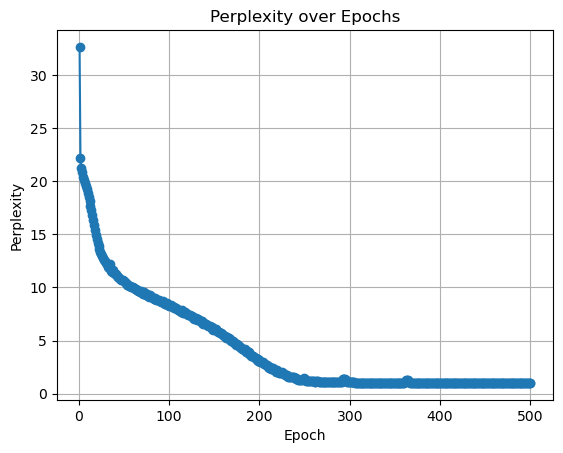

In [3]:
num_inputs = vocab_size
gru_layer = nn.GRU(input_size=num_inputs, hidden_size=num_hiddens)
model = rnn.RNNModel(gru_layer, vocab_size)
model = model.to(device)
rnn.train(model, train_iter, vocab, lr, num_epochs, device)